# <center> <span style="color:lightblue">TA-Lib</span>


In [1]:
import talib as ta
import yfinance as yf
import datetime as dt
import pandas as pd
import pandas_ta as ta

import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas_datareader.data as reader
#import shap
import numpy as np



c:\Users\ACER\anaconda3\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
yf.pdr_override()
end=dt.datetime.now()
start=dt.datetime(end.year-5,end.month,end.day)
Input=['MSFT','^GSPC','AAPL']

In [3]:
df=reader.get_data_yahoo(Input, start, end)["Adj Close"]
df

[*********************100%%**********************]  3 of 3 completed


Ticker,AAPL,MSFT,^GSPC
Date,,,
2019-03-25,45.424942,111.999657,2798.360107
2019-03-26,44.955627,112.237633,2818.459961
2019-03-27,45.359962,111.152458,2805.370117
2019-03-28,45.420132,111.304764,2815.439941
2019-03-29,45.716156,112.266182,2834.399902
...,...,...,...
2024-03-18,173.720001,417.320007,5149.419922
2024-03-19,176.080002,421.410004,5178.509766
2024-03-20,178.669998,425.230011,5224.620117


In [4]:
#yf.pdr_override()
#data=web.DataReader(name="AAPL",data_source="yahoo")


In [5]:
df["APPL_SMA_100"]=ta.SMA(df["AAPL"],100)

AttributeError: module 'pandas_ta' has no attribute 'SMA'

In [ ]:
df

Ticker,AAPL,MSFT,^GSPC,APPL_SMA_100
Date,,,,
2019-03-20,45.285351,111.866394,2824.229980,NaN
2019-03-21,46.953232,114.436485,2854.879883,NaN
2019-03-22,45.980900,111.418999,2800.709961,NaN
2019-03-25,45.424953,111.999672,2798.360107,NaN
2019-03-26,44.955631,112.237625,2818.459961,NaN
...,...,...,...,...
2024-03-14,173.000000,425.220001,5150.479980,184.962162
2024-03-15,172.619995,416.420013,5117.089844,184.964037
2024-03-18,173.720001,417.320007,5149.419922,184.975715


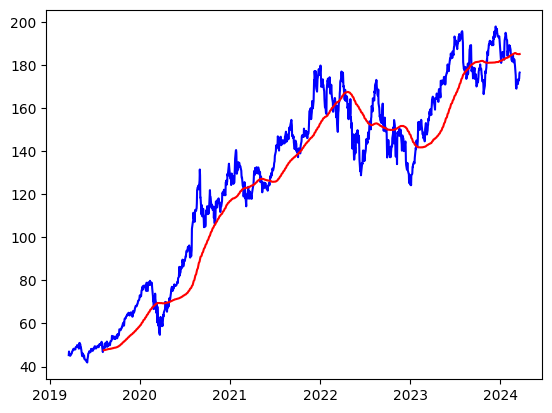

In [ ]:
plt.plot(df["AAPL"],color="b")
plt.plot(df["APPL_SMA_100"],color="r")
plt.show()

In [ ]:
df["APPL_SMA_50"]=ta.SMA(df["AAPL"],50)
df["APPL_RSI_14"]=ta.RSI(df["AAPL"],timeperiod=14)
df["APPL_upper_band"],df["APPL_middle_band"],df["APPL_lower_band"]=ta.BBANDS(df["AAPL"],timeperiod=20,nbdevup=2,nbdevdn=2)
df

Ticker,AAPL,MSFT,^GSPC,APPL_SMA_100,APPL_SMA_50,APPL_RSI_14,APPL_upper_band,APPL_middle_band,APPL_lower_band
Date,,,,,,,,,
2019-03-20,45.285351,111.866394,2824.229980,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,46.953232,114.436485,2854.879883,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,45.980900,111.418999,2800.709961,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-25,45.424953,111.999672,2798.360107,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-26,44.955631,112.237625,2818.459961,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-03-14,173.000000,425.220001,5150.479980,184.962162,183.393916,37.725189,188.251476,177.33700,166.422525
2024-03-15,172.619995,416.420013,5117.089844,184.964037,183.166012,37.072137,187.442826,176.77500,166.107174
2024-03-18,173.720001,417.320007,5149.419922,184.975715,183.006848,40.294124,186.776416,176.34550,165.914585


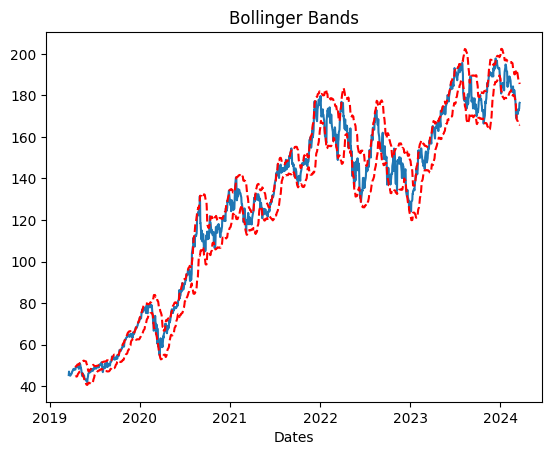

In [ ]:
plt.plot(df["AAPL"])
plt.plot(df["APPL_upper_band"],color="r",linestyle="--")
plt.plot(df["APPL_lower_band"],color="r",linestyle="--")
plt.title("Bollinger Bands")
plt.xlabel("Dates")
plt.show()

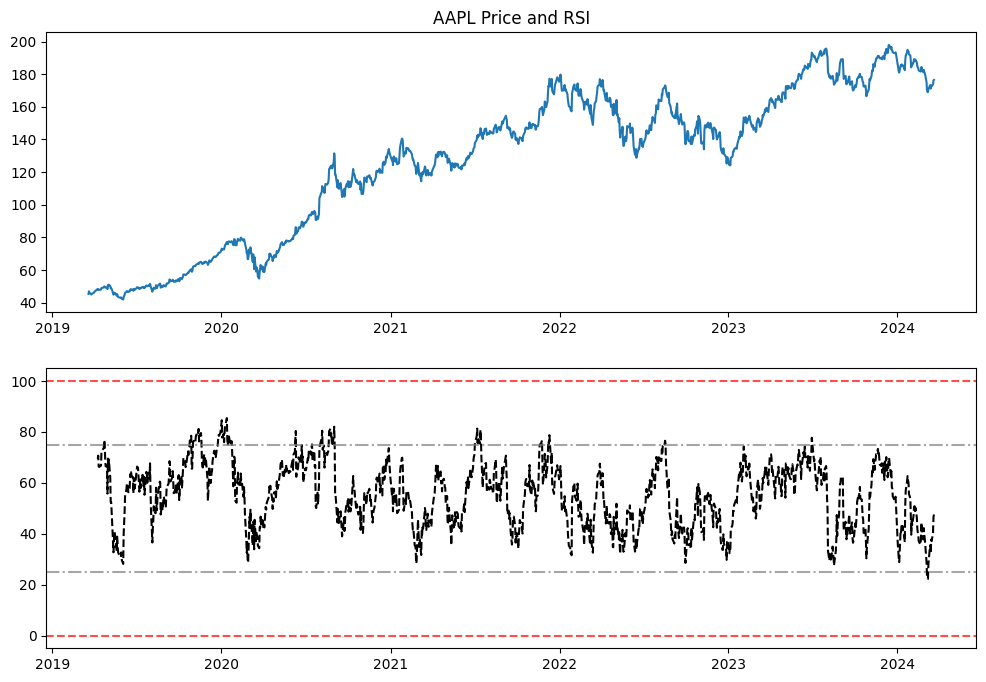

In [ ]:
plt.figure(figsize=(12,8))
ax1=plt.subplot(2,1,1)

ax1.plot(df["AAPL"])
ax2=plt.subplot(2,1,2,sharex=ax1)
ax2.plot(df["APPL_RSI_14"],color="black",linestyle="--")
ax1.set_title("AAPL Price and RSI")
ax2.axhline(25,linestyle="-.",alpha=0.7,color="gray")
ax2.axhline(75,linestyle="-.",alpha=0.7,color="gray")
ax2.axhline(0,linestyle="--",alpha=0.7,color="r")
ax2.axhline(100,linestyle="--",alpha=0.7,color="r")
plt.show()

In [ ]:
#import shap


In [7]:
df=pd.DataFrame()
apple=df.ta.ticker("aapl",period="6mo",interval="1h")
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-25 09:30:00-04:00,174.199997,175.550003,174.149994,174.470001,10347795,0.0,0.0
2023-09-25 10:30:00-04:00,174.460007,176.539993,174.369995,176.270004,6689826,0.0,0.0
2023-09-25 11:30:00-04:00,176.287994,176.970001,175.880005,176.880005,5521525,0.0,0.0
2023-09-25 12:30:00-04:00,176.884995,176.910004,176.039993,176.130005,4345407,0.0,0.0
2023-09-25 13:30:00-04:00,176.149994,176.367599,175.679993,175.774994,4024629,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-22 11:30:00-04:00,172.270004,172.889999,172.070007,172.365005,5763015,0.0,0.0
2024-03-22 12:30:00-04:00,172.369995,172.940002,172.089996,172.613998,5023927,0.0,0.0
2024-03-22 13:30:00-04:00,172.619995,172.679993,172.360001,172.625000,4107617,0.0,0.0
